In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# 從 CSV 文件中加載數據
output_path = './training_data.csv'
df = pd.read_csv(output_path)

# 提取输入特征和输出标签
X = df[['initial_speed', 'initial_angle']].values
Y = df[['max_range','max_height']].values  # 回歸任务，單值
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import Callback

# 定義ANN
model = Sequential([
    Dense(6, activation='relu', input_shape=(2,)),  # 隱藏層2, 有6個神經元
    Dense(6, activation='relu'),  # 隱藏層2, 有6個神經元
    Dense(2)  # 輸出層, 無激活函數
])

# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['accuracy'])




# 模型训练
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=200, batch_size=4, validation_split=0.1)



Epoch 1/200
170/170 [==============================] - 1s 2ms/step - loss: 30555.8477 - accuracy: 0.8074 - val_loss: 17959.3125 - val_accuracy: 0.7237
Epoch 2/200
170/170 [==============================] - 0s 1ms/step - loss: 15368.8174 - accuracy: 0.7588 - val_loss: 16309.8252 - val_accuracy: 0.7105
Epoch 3/200
170/170 [==============================] - 0s 1ms/step - loss: 13233.9795 - accuracy: 0.7559 - val_loss: 12778.7266 - val_accuracy: 0.7237
Epoch 4/200
170/170 [==============================] - 0s 1ms/step - loss: 11873.2461 - accuracy: 0.7353 - val_loss: 11245.1963 - val_accuracy: 0.7632
Epoch 5/200
170/170 [==============================] - 0s 1ms/step - loss: 11163.4473 - accuracy: 0.7632 - val_loss: 9862.6328 - val_accuracy: 0.7237
Epoch 6/200
170/170 [==============================] - 0s 1ms/step - loss: 9951.2031 - accuracy: 0.7588 - val_loss: 9203.8779 - val_accuracy: 0.7237
Epoch 7/200
170/170 [==============================] - 0s 1ms/step - loss: 9191.3916 - accuracy: 

6/6 [==============================] - 0s 1ms/step - loss: 1171.4121 - accuracy: 0.8307


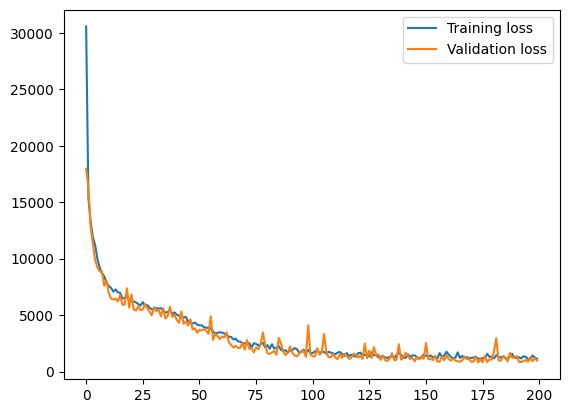

In [22]:
# model.evaluate(x_test, y_test)
loss = model.evaluate(x_test, y_test)

# 繪製訓練歷史
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

6/6 [==============================] - 0s 998us/step


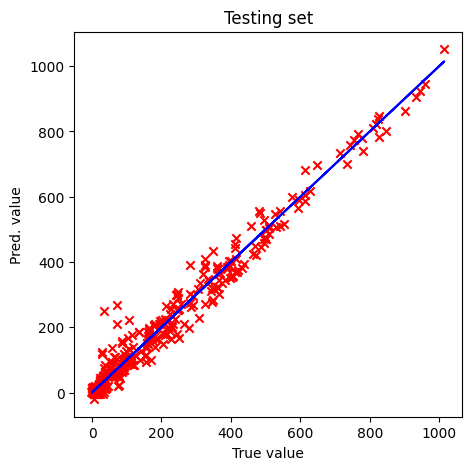

24/24 [==============================] - 0s 997us/step


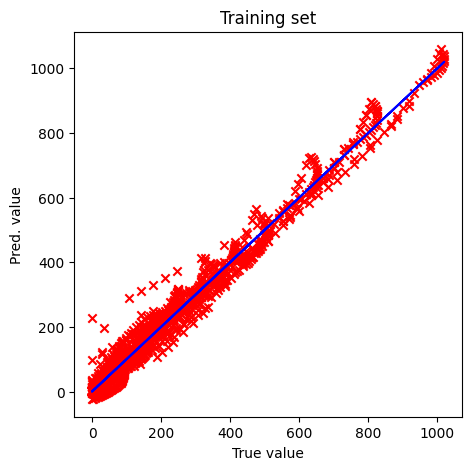

In [23]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


24/24 [==============================] - 0s 780us/step


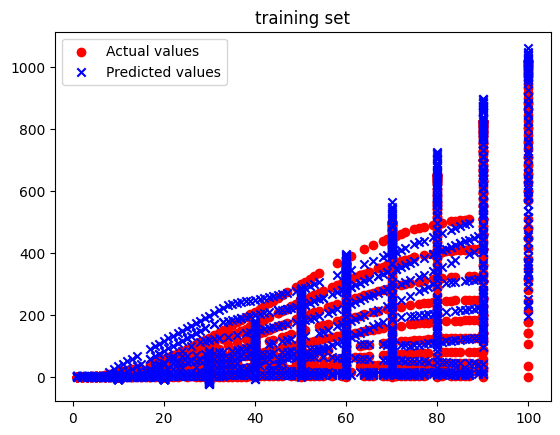

6/6 [==============================] - 0s 1ms/step


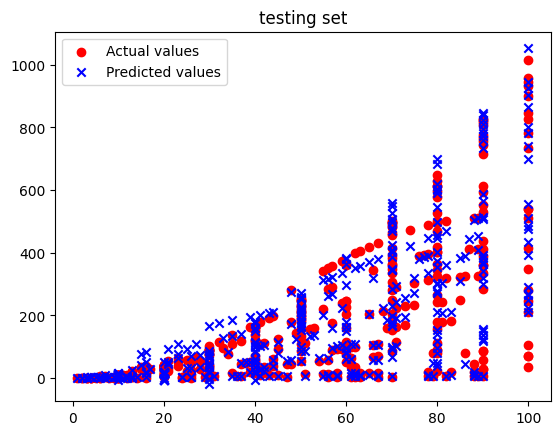

In [25]:
y_pred = model.predict(x_train)
plt.scatter(x_train, y_train, color='red', label='Actual values')
plt.scatter(x_train, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()


y_pred = model.predict(x_test)
plt.scatter(x_test, y_test, color='red', label='Actual values')
plt.scatter(x_test, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import r2_score
y_pred = np.squeeze(y_pred)
r2 = r2_score(y_pred,y_test)
print(r2)

0.9726249152291455


In [27]:
>>> from sklearn.datasets import make_regression
>>> from sklearn.feature_selection import r_regression

y_pred = model.predict(x_test)
Pearson_test = r_regression(y_test.reshape(-1,1),y_pred.ravel())
y_pred = model.predict(x_train)
Pearson_train = r_regression(y_train.reshape(-1,1),y_pred.ravel())

print(Pearson_test,Pearson_train)

24/24 [==============================] - 0s 780us/step
[0.98771141] [0.99143024]


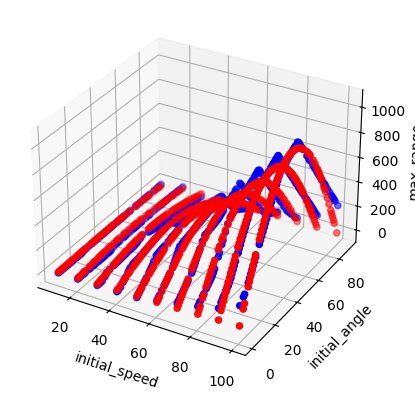

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 生成一些示例数据
x = x_train[:,0]
y = x_train[:,1]
z = y_pred[:,0]

# 创建一个图形窗口
fig = plt.figure()

# 在图形窗口上添加一个3D坐标轴
ax = fig.add_subplot(111, projection='3d')
# 绘制3D散点图
ax.scatter(x, y, z, color='blue',label='Actual_values')
x = x_train[:,0]
y = x_train[:,1]
z = y_train[:,0]
ax.scatter(x, y, z, color='red',label='Actual_values')
# 设置坐标轴标签
ax.set_xlabel('initial_speed')
ax.set_ylabel('initial_angle')
ax.set_zlabel('max_range')

# 显示图形
plt.show()

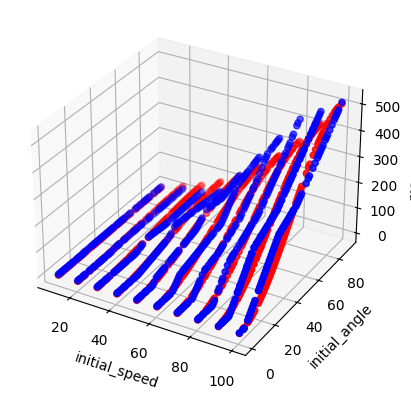

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 生成一些示例数据
x = x_train[:,0]
y = x_train[:,1]
z = y_pred[:,1]

# 创建一个图形窗口
fig = plt.figure()

# 在图形窗口上添加一个3D坐标轴
ax = fig.add_subplot(111, projection='3d')
# 绘制3D散点图
ax.scatter(x, y, z, color='blue',label='Actual_values')
x = x_train[:,0]
y = x_train[:,1]
z = y_train[:,1]
ax.scatter(x, y, z, color='red',label='Actual_values')
# 设置坐标轴标签
ax.set_xlabel('initial_speed')
ax.set_ylabel('initial_angle')
ax.set_zlabel('max_range')

# 显示图形
plt.show()